In [71]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.constants as const
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plt.rcParams['legend.facecolor'] = 'white'

In [72]:
p1_1p5 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/0.1 to 1.5/REAL_S21S11_GapSweep_0.1to1.5.csv', skiprows=4)
p1_1p5

% x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
0            0.0001      3.4155  -3.849967 -7.866684
1            0.0001      3.4156  -5.139305 -2.598708
2            0.0001      3.4157  -8.063576 -1.040910
3            0.0001      3.4158  -9.651232 -0.693295
4            0.0001      3.4159 -10.615323 -0.556647
...             ...         ...        ...       ...
1546         0.0015      3.4161 -22.389992 -0.110884
1547         0.0015      3.4162 -11.251864 -1.080560
1548         0.0015      3.4163 -35.647635 -0.078216
1549         0.0015      3.4164 -30.557075 -0.079000
1550         0.0015      3.4165 -29.300604 -0.080169

[1551 rows x 4 columns]

In [73]:
def separate_p1_2(df):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # to normalize float precision
    unique_vals = sorted(df['% x_strip (m)'].unique())
    
    chunks = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val]
        chunks.append(subset)
    
    return chunks

In [74]:
p1_1p5_sep = separate_p1_2(p1_1p5)

In [75]:
p1_1p5_sep[22]

% x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
242        0.00032      3.4155 -14.006797 -0.396745
243        0.00032      3.4156  -9.907620 -0.966203
244        0.00032      3.4157  -3.766388 -8.195227
245        0.00032      3.4158 -16.081227 -0.394427
246        0.00032      3.4159 -25.853576 -0.159235
247        0.00032      3.4160 -38.394085 -0.123441
248        0.00032      3.4161 -40.766958 -0.115347
249        0.00032      3.4162 -33.501210 -0.113845
250        0.00032      3.4163 -30.655933 -0.114253
251        0.00032      3.4164 -29.065354 -0.115241
252        0.00032      3.4165 -28.034375 -0.116375

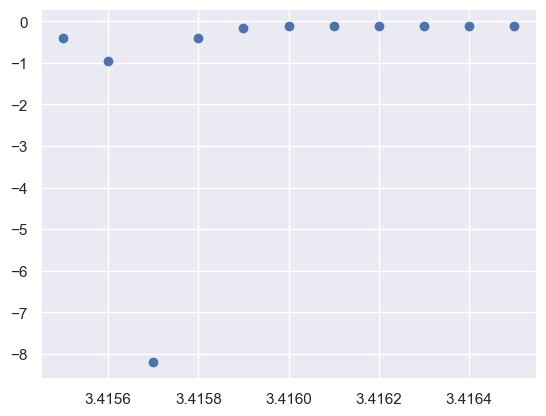

In [113]:
plt.scatter(p1_1p5_sep[22]['freq (GHz)'], p1_1p5_sep[22]['S21 (1)'])

In [76]:
len(p1_1p5_sep)

141

Text(0.5, 1.0, '$S_{21}$, $f_{center} = 3.41$ GHz')

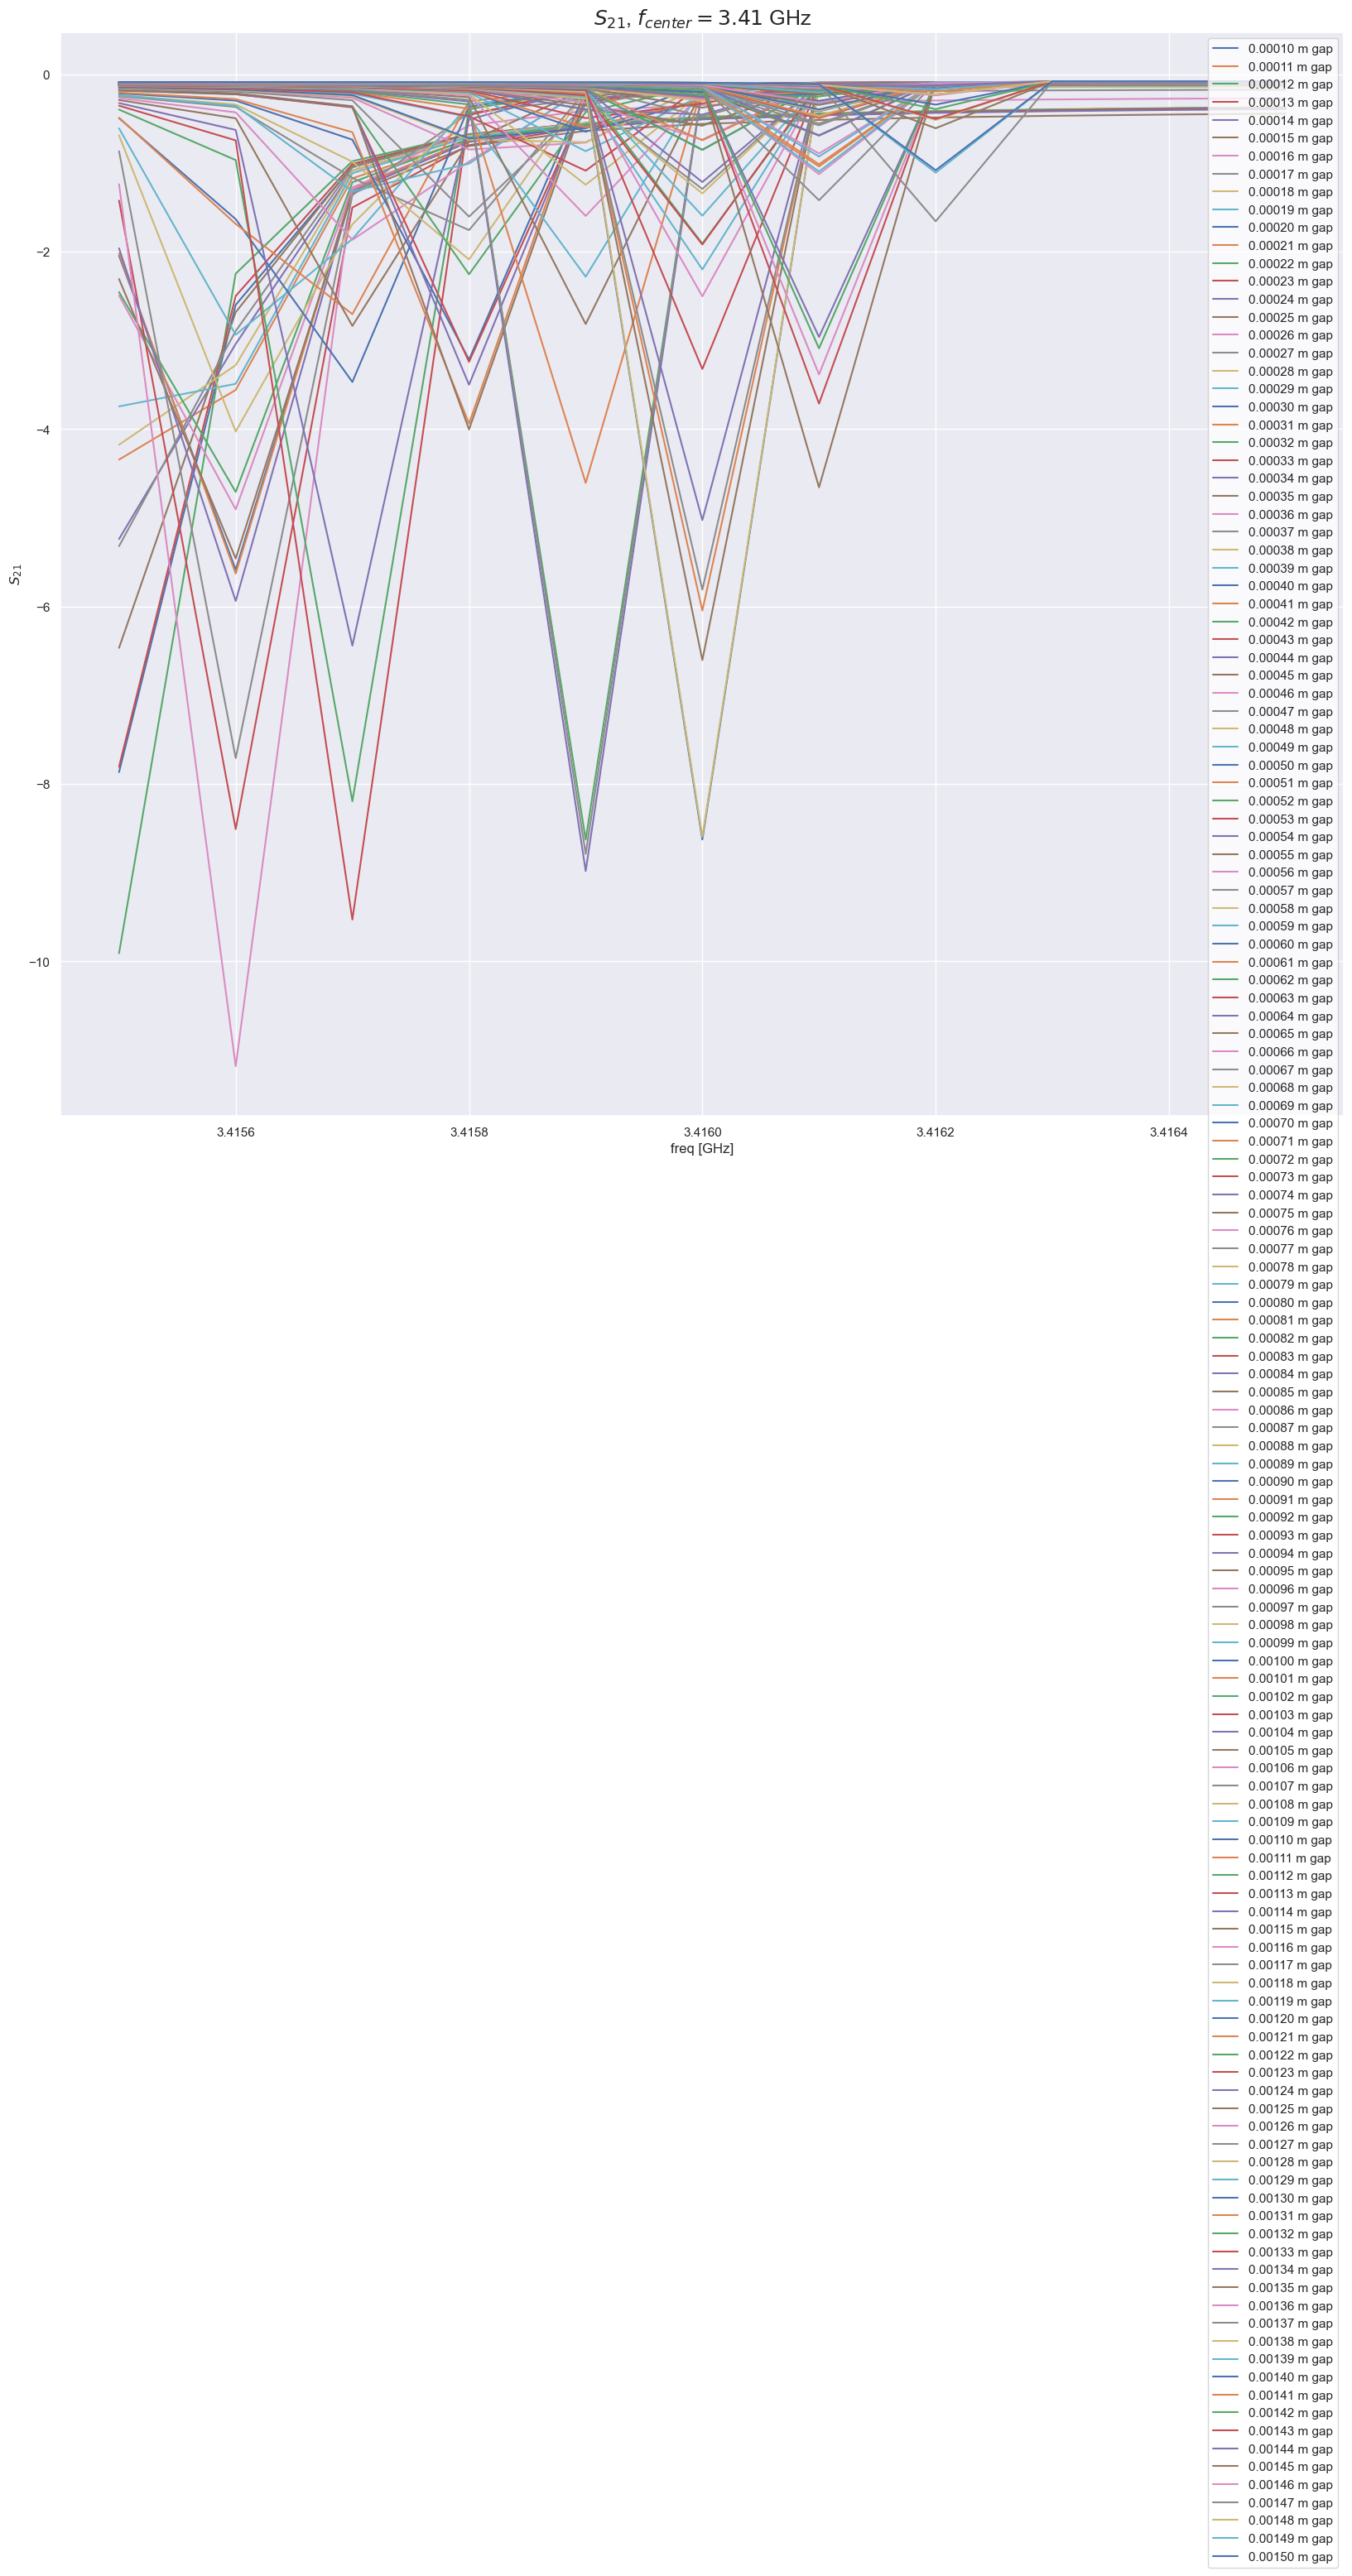

In [112]:
fig, ax = plt.subplots(figsize = (20,17))
for i in range(len(p1_1p5_sep)): 
    ax.plot(p1_1p5_sep[i]['freq (GHz)'], p1_1p5_sep[i]['S21 (1)'], label=f"{p1_1p5_sep[i]['% x_strip (m)'].iloc[0]:.5f} m gap")

ax.grid(True)
ax.set_xlabel('freq [GHz]')
ax.set_ylabel(r'$S_{21}$')
ax.legend(facecolor='white')
ax.set_title(r'$S_{21}$, $f_{center} = 3.41$ GHz', fontsize = 18)

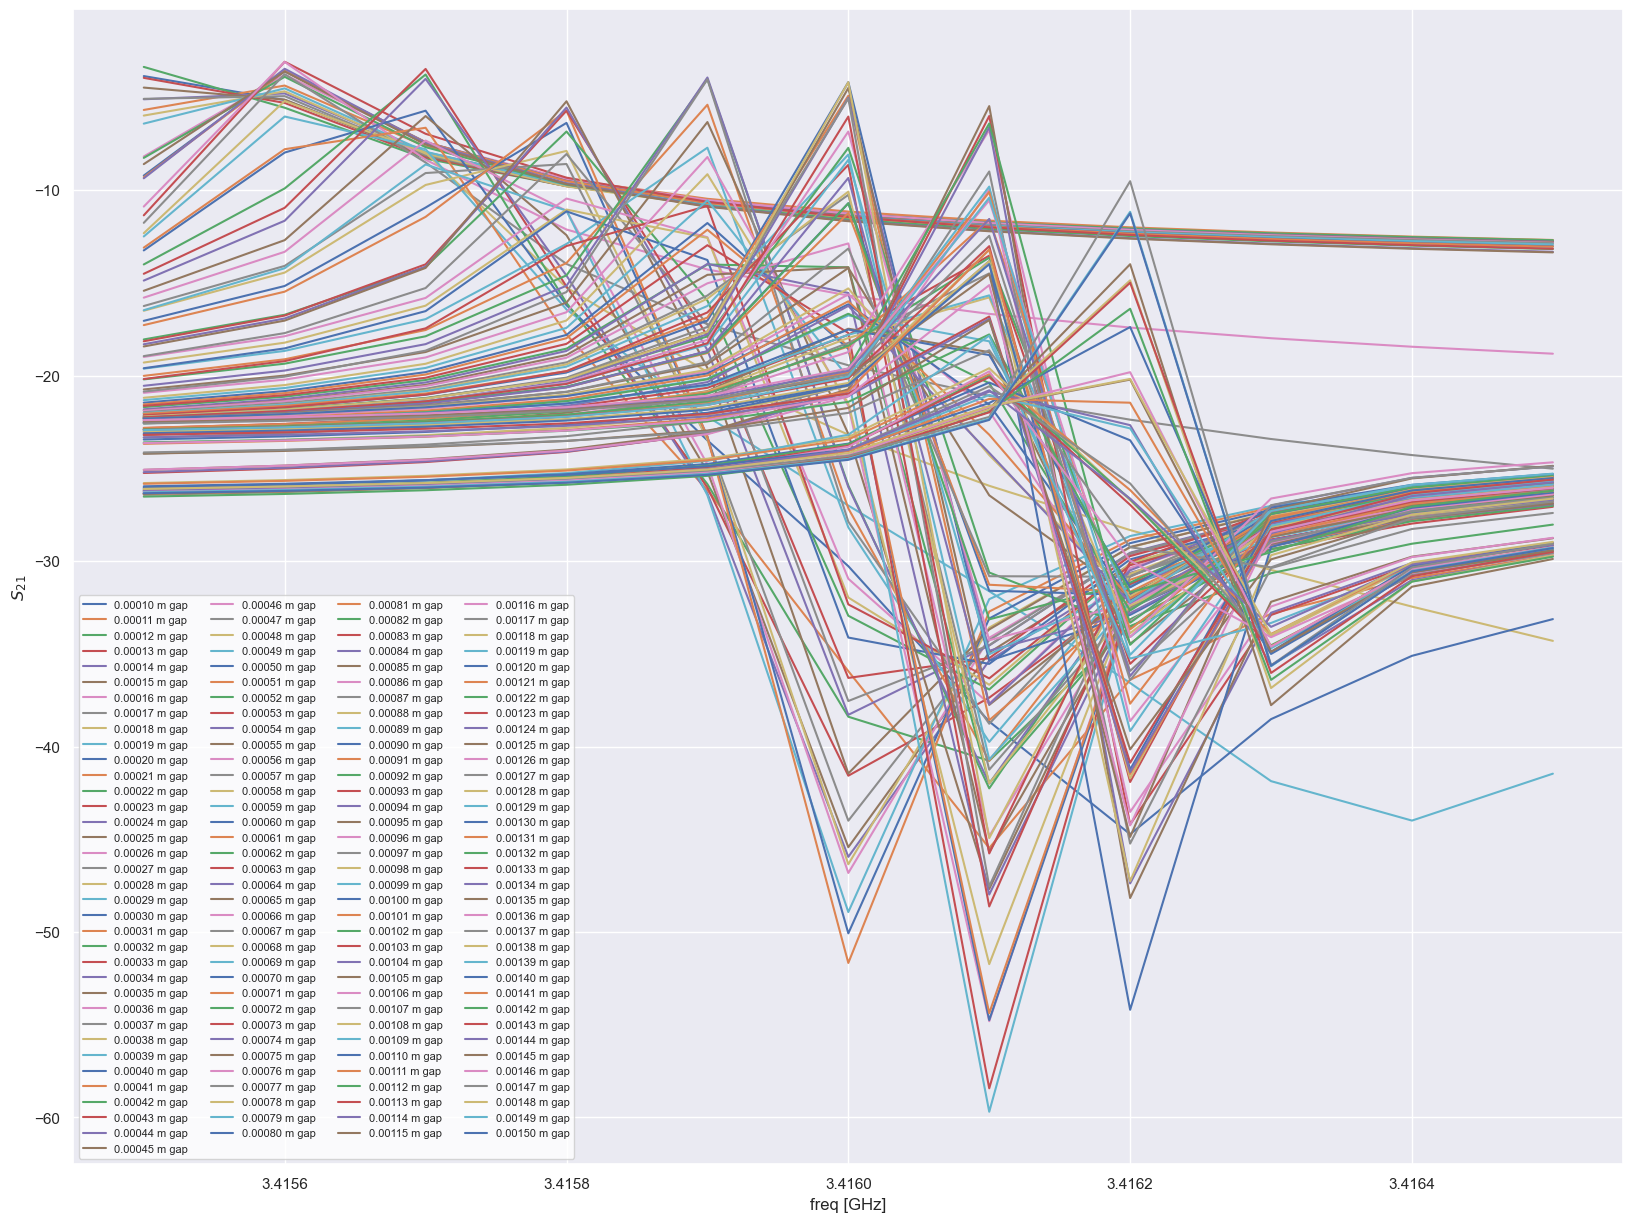

In [78]:
fig, ax = plt.subplots(figsize = (20,15))
for i in range(len(p1_1p5_sep)): 
    ax.plot(p1_1p5_sep[i]['freq (GHz)'], p1_1p5_sep[i]['S11 (1)'], label=f"{p1_1p5_sep[i]['% x_strip (m)'].iloc[0]:.5f} m gap")
ax.grid(True)
ax.set_xlabel('freq [GHz]')
ax.set_ylabel(r'$S_{21}$')
ax.legend(facecolor='white', ncol = 4, fontsize=8)

In [79]:
def separate_dips(df):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # Normalize float precision
    unique_vals = sorted(df['% x_strip (m)'].unique())
    
    chunks = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val].copy()  # <— this is the key fix
        subset['dip_mag'] = np.abs(subset['S21 (1)'].max()) - np.abs(subset['S21 (1)'].min())
        chunks.append(subset)
    
    return chunks

In [80]:
dips_p11p5 = separate_dips(p1_1p5)

In [81]:
dips_p11p5

[    % x_strip (m)  freq (GHz)    S11 (1)   S21 (1)   dip_mag
 0          0.0001      3.4155  -3.849967 -7.866684 -7.493547
 1          0.0001      3.4156  -5.139305 -2.598708 -7.493547
 2          0.0001      3.4157  -8.063576 -1.040910 -7.493547
 3          0.0001      3.4158  -9.651232 -0.693295 -7.493547
 4          0.0001      3.4159 -10.615323 -0.556647 -7.493547
 5          0.0001      3.4160 -11.259868 -0.486643 -7.493547
 6          0.0001      3.4161 -11.720783 -0.444915 -7.493547
 7          0.0001      3.4162 -12.066416 -0.417516 -7.493547
 8          0.0001      3.4163 -12.335215 -0.398258 -7.493547
 9          0.0001      3.4164 -12.550110 -0.384030 -7.493547
 10         0.0001      3.4165 -12.725759 -0.373137 -7.493547,
     % x_strip (m)  freq (GHz)    S11 (1)   S21 (1)   dip_mag
 11        0.00011      3.4155  -5.676002 -4.343493 -3.967312
 12        0.00011      3.4156  -4.360519 -3.557654 -3.967312
 13        0.00011      3.4157  -7.643054 -1.171933 -3.967312
 14    

In [82]:
concat_dips_p11p5 = pd.concat(dips_p11p5)

In [83]:
concat_dips_p11p5

% x_strip (m)  freq (GHz)    S11 (1)   S21 (1)   dip_mag
0            0.0001      3.4155  -3.849967 -7.866684 -7.493547
1            0.0001      3.4156  -5.139305 -2.598708 -7.493547
2            0.0001      3.4157  -8.063576 -1.040910 -7.493547
3            0.0001      3.4158  -9.651232 -0.693295 -7.493547
4            0.0001      3.4159 -10.615323 -0.556647 -7.493547
...             ...         ...        ...       ...       ...
1546         0.0015      3.4161 -22.389992 -0.110884 -1.002344
1547         0.0015      3.4162 -11.251864 -1.080560 -1.002344
1548         0.0015      3.4163 -35.647635 -0.078216 -1.002344
1549         0.0015      3.4164 -30.557075 -0.079000 -1.002344
1550         0.0015      3.4165 -29.300604 -0.080169 -1.002344

[1551 rows x 5 columns]

In [84]:
def separate_get_gaps_dips(df):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # Normalize float precision
    unique_vals = sorted(df['% x_strip (m)'].unique())
    
    chunks = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val].copy()  # <— this is the key fix
        subset['dip_mag'] = np.abs(subset['S21 (1)'].max()) - np.abs(subset['S21 (1)'].min())
        chunks.append(subset)

    gaps_dips_chunks = []
    for chunk in range(len(chunks)):
        dips_pair = [chunks[chunk]['% x_strip (m)'].iloc[0], chunks[chunk]['dip_mag'].iloc[0]]
        gaps_dips_chunks.append(dips_pair)
    
    return np.array(gaps_dips_chunks)

In [85]:
testing3 = separate_get_gaps_dips(p1_1p5)

In [86]:
testing3

array([[ 1.00000000e-04, -7.49354730e+00],
       [ 1.10000000e-04, -3.96731186e+00],
       [ 1.20000000e-04, -9.53149454e+00],
       [ 1.30000000e-04, -7.43451301e+00],
       [ 1.40000000e-04, -4.86421685e+00],
       [ 1.50000000e-04, -6.09136960e+00],
       [ 1.60000000e-04, -4.52999545e+00],
       [ 1.70000000e-04, -4.94387320e+00],
       [ 1.80000000e-04, -3.80615575e+00],
       [ 1.90000000e-04, -3.36703640e+00],
       [ 2.00000000e-04, -5.21104658e+00],
       [ 2.10000000e-04, -5.25273532e+00],
       [ 2.20000000e-04, -4.33291944e+00],
       [ 2.30000000e-04, -8.12714120e+00],
       [ 2.40000000e-04, -5.54653040e+00],
       [ 2.50000000e-04, -5.01600703e+00],
       [ 2.60000000e-04, -1.09148270e+01],
       [ 2.70000000e-04, -7.53548483e+00],
       [ 2.80000000e-04, -3.88586621e+00],
       [ 2.90000000e-04, -2.80701776e+00],
       [ 3.00000000e-04, -3.34649085e+00],
       [ 3.10000000e-04, -2.58610150e+00],
       [ 3.20000000e-04, -8.08138226e+00],
       [ 3.

In [87]:
gaps_dips = []
for i in range(len(dips_p11p5)):
    dips_pair = dips_p11p5[i]['% x_strip (m)'].iloc[0], dips_p11p5[i]['dip_mag'].iloc[0]
    gaps_dips.append(dips_pair)

gaps_dips = np.array(gaps_dips)

In [88]:
gaps_dips

array([[ 1.00000000e-04, -7.49354730e+00],
       [ 1.10000000e-04, -3.96731186e+00],
       [ 1.20000000e-04, -9.53149454e+00],
       [ 1.30000000e-04, -7.43451301e+00],
       [ 1.40000000e-04, -4.86421685e+00],
       [ 1.50000000e-04, -6.09136960e+00],
       [ 1.60000000e-04, -4.52999545e+00],
       [ 1.70000000e-04, -4.94387320e+00],
       [ 1.80000000e-04, -3.80615575e+00],
       [ 1.90000000e-04, -3.36703640e+00],
       [ 2.00000000e-04, -5.21104658e+00],
       [ 2.10000000e-04, -5.25273532e+00],
       [ 2.20000000e-04, -4.33291944e+00],
       [ 2.30000000e-04, -8.12714120e+00],
       [ 2.40000000e-04, -5.54653040e+00],
       [ 2.50000000e-04, -5.01600703e+00],
       [ 2.60000000e-04, -1.09148270e+01],
       [ 2.70000000e-04, -7.53548483e+00],
       [ 2.80000000e-04, -3.88586621e+00],
       [ 2.90000000e-04, -2.80701776e+00],
       [ 3.00000000e-04, -3.34649085e+00],
       [ 3.10000000e-04, -2.58610150e+00],
       [ 3.20000000e-04, -8.08138226e+00],
       [ 3.

In [89]:
def get_gap_dips(df): 
    gaps_dips = []
    for i in range(len(df)):
        dips_pair = [df[i]['% x_strip (m)'].iloc[0], df[i]['dip_mag'].iloc[0]]
        gaps_dips.append(dips_pair)
    gaps_dips = np.array(gaps_dips)

    return gaps_dips

In [90]:
gd_p11p5 = get_gap_dips(dips_p11p5)

In [91]:
def gap_dips_to_table(df): 
    for i in range(len(df)):
        dips_pair = [df[i]['% x_strip (m)'].iloc[0], df[i]['dip_mag'].iloc[0]]
        gaps_dips.append(dips_pair)
    gaps_dips = np.array(gaps_dips)

    return gaps_dips

In [92]:
gd_p11p5

array([[ 1.00000000e-04, -7.49354730e+00],
       [ 1.10000000e-04, -3.96731186e+00],
       [ 1.20000000e-04, -9.53149454e+00],
       [ 1.30000000e-04, -7.43451301e+00],
       [ 1.40000000e-04, -4.86421685e+00],
       [ 1.50000000e-04, -6.09136960e+00],
       [ 1.60000000e-04, -4.52999545e+00],
       [ 1.70000000e-04, -4.94387320e+00],
       [ 1.80000000e-04, -3.80615575e+00],
       [ 1.90000000e-04, -3.36703640e+00],
       [ 2.00000000e-04, -5.21104658e+00],
       [ 2.10000000e-04, -5.25273532e+00],
       [ 2.20000000e-04, -4.33291944e+00],
       [ 2.30000000e-04, -8.12714120e+00],
       [ 2.40000000e-04, -5.54653040e+00],
       [ 2.50000000e-04, -5.01600703e+00],
       [ 2.60000000e-04, -1.09148270e+01],
       [ 2.70000000e-04, -7.53548483e+00],
       [ 2.80000000e-04, -3.88586621e+00],
       [ 2.90000000e-04, -2.80701776e+00],
       [ 3.00000000e-04, -3.34649085e+00],
       [ 3.10000000e-04, -2.58610150e+00],
       [ 3.20000000e-04, -8.08138226e+00],
       [ 3.

In [93]:
all_dips = np.vstack(gd_p11p5)
all_dips

array([[ 1.00000000e-04, -7.49354730e+00],
       [ 1.10000000e-04, -3.96731186e+00],
       [ 1.20000000e-04, -9.53149454e+00],
       [ 1.30000000e-04, -7.43451301e+00],
       [ 1.40000000e-04, -4.86421685e+00],
       [ 1.50000000e-04, -6.09136960e+00],
       [ 1.60000000e-04, -4.52999545e+00],
       [ 1.70000000e-04, -4.94387320e+00],
       [ 1.80000000e-04, -3.80615575e+00],
       [ 1.90000000e-04, -3.36703640e+00],
       [ 2.00000000e-04, -5.21104658e+00],
       [ 2.10000000e-04, -5.25273532e+00],
       [ 2.20000000e-04, -4.33291944e+00],
       [ 2.30000000e-04, -8.12714120e+00],
       [ 2.40000000e-04, -5.54653040e+00],
       [ 2.50000000e-04, -5.01600703e+00],
       [ 2.60000000e-04, -1.09148270e+01],
       [ 2.70000000e-04, -7.53548483e+00],
       [ 2.80000000e-04, -3.88586621e+00],
       [ 2.90000000e-04, -2.80701776e+00],
       [ 3.00000000e-04, -3.34649085e+00],
       [ 3.10000000e-04, -2.58610150e+00],
       [ 3.20000000e-04, -8.08138226e+00],
       [ 3.

In [94]:
all_dips_df = pd.DataFrame(all_dips, columns=['gap distance [m]', 'dB dip'])
all_dips_df

gap distance [m]    dB dip
0             0.00010 -7.493547
1             0.00011 -3.967312
2             0.00012 -9.531495
3             0.00013 -7.434513
4             0.00014 -4.864217
..                ...       ...
136           0.00146 -0.159235
137           0.00147 -1.578269
138           0.00148 -0.149464
139           0.00149 -1.030290
140           0.00150 -1.002344

[141 rows x 2 columns]

Text(0.5, 1.0, 'S21 Dip Mag @ LO 3.415 GHz')

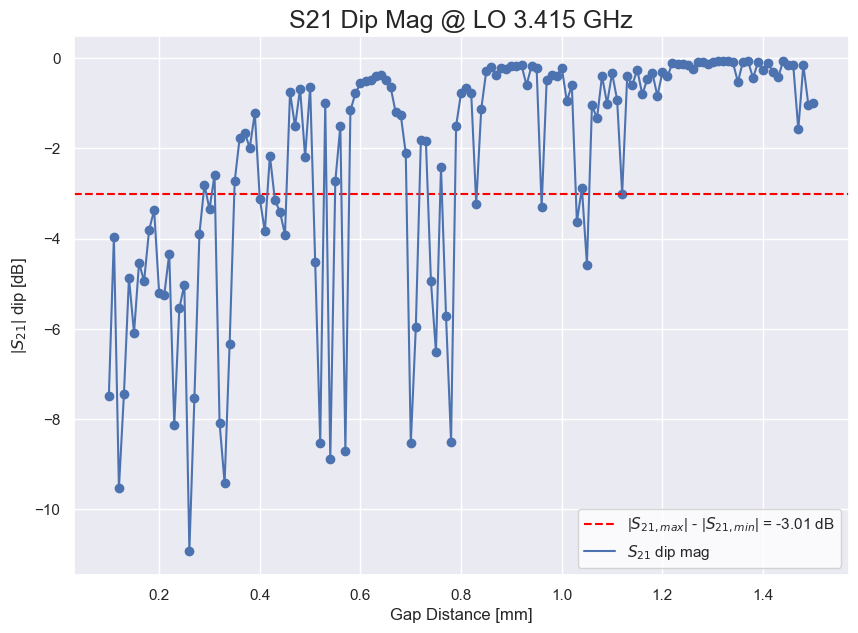

In [95]:
plt.figure(figsize = (10, 7))
plt.grid(True)
plt.axhline(y=-3.01, color='red', ls = 'dashed', label = r'|$S_{21, max}$| - |$S_{21, min}$| = -3.01 dB')
plt.plot(1e3*all_dips_df['gap distance [m]'], all_dips_df['dB dip'], label=r'$S_{21}$ dip mag') # multiply for mm 
plt.scatter(1e3*all_dips_df['gap distance [m]'], all_dips_df['dB dip'])
plt.xlabel('Gap Distance [mm]')
plt.ylabel(r'|$S_{21}$| dip [dB]')
plt.legend()
plt.title('S21 Dip Mag @ LO 3.415 GHz', fontsize = 18)


In [144]:
len(p1_1p5[p1_1p5['% x_strip (m)']==0.0002])

11

Text(0.5, 1.0, 'S21 vs. Gap Distance')

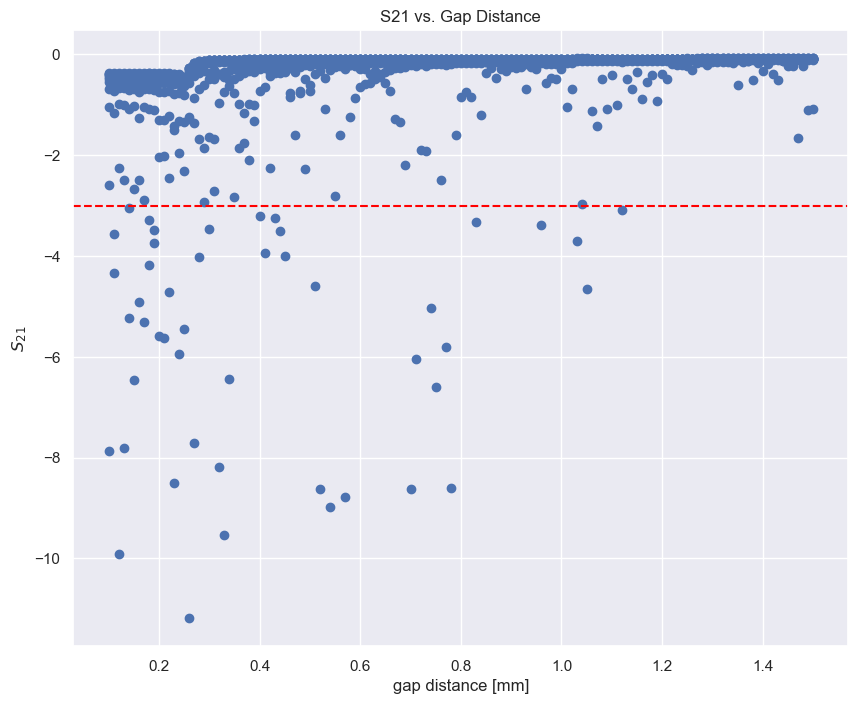

In [97]:
plt.figure(figsize = (10,8))
plt.grid(True)
plt.axhline(y=-3.01, color='red', ls = 'dashed', label = r'|$S_{21, max}$| - |$S_{21, min}$| = -3.01 dB')
plt.scatter(1e3*p1_1p5['% x_strip (m)'], p1_1p5['S21 (1)'])
plt.xlabel('gap distance [mm]')
plt.ylabel(r'$S_{21}$')
plt.title('S21 vs. Gap Distance')

Text(0.5, 1.0, 'S21 vs. Gap Distance')

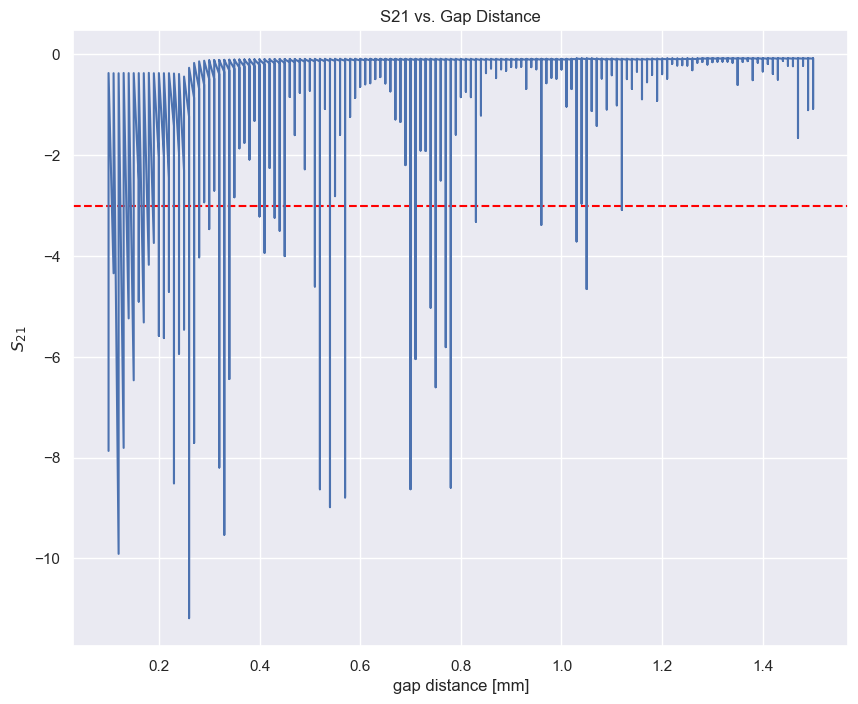

In [99]:
plt.figure(figsize = (10,8))
plt.grid(True)
plt.axhline(y=-3.01, color='red', ls = 'dashed', label = r'|$S_{21, max}$| - |$S_{21, min}$| = -3.01 dB')
plt.plot(1e3*p1_1p5['% x_strip (m)'], p1_1p5['S21 (1)'])
plt.xlabel('gap distance [mm]')
plt.ylabel(r'$S_{21}$')
plt.title('S21 vs. Gap Distance')

In [137]:
len(p1_1p5[p1_1p5['% x_strip (m)']==0.00012])

11

In [100]:
# Assuming your DataFrame has columns: 'Gap', 'Frequency', 'S21_dB' (or magnitude), etc.
# Pivot to create a 2D matrix (gap × freq) with S21 magnitude as values
pivoted = concat_dips_p11p5.pivot(columns='% x_strip (m)', index='freq (GHz)', values='S21 (1)')  # or 'S21_mag'

In [140]:
comparison_chop = p1_1p5[p1_1p5['% x_strip (m)']<0.0012]

In [141]:
comparison_chop

% x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
0           0.00010      3.4155  -3.849967 -7.866684
1           0.00010      3.4156  -5.139305 -2.598708
2           0.00010      3.4157  -8.063576 -1.040910
3           0.00010      3.4158  -9.651232 -0.693295
4           0.00010      3.4159 -10.615323 -0.556647
...             ...         ...        ...       ...
1205        0.00119      3.4161 -10.410546 -0.926363
1206        0.00119      3.4162 -35.055704 -0.088339
1207        0.00119      3.4163 -27.300910 -0.088109
1208        0.00119      3.4164 -25.891213 -0.090649
1209        0.00119      3.4165 -25.287886 -0.092280

[1210 rows x 4 columns]

In [142]:
chop_compare_pivot = comparison_chop.pivot_table(index='% x_strip (m)', columns='freq (GHz)', values='S21 (1)').sort_index(ascending=False)

In [116]:
map_setup_2 = concat_dips_p11p5.pivot_table(index='% x_strip (m)', columns='freq (GHz)', values='S21 (1)').sort_index(ascending=False)

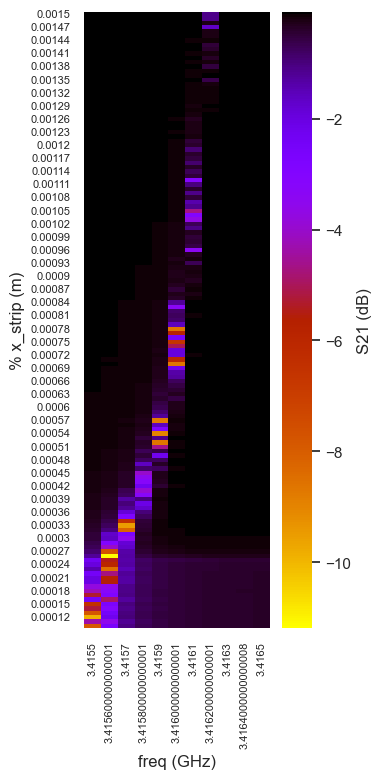

In [124]:
plt.figure(figsize=(3, 8))
# Make heatmap
sns.heatmap(
    map_setup_2,
    cmap='gnuplot_r',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=3,      # Control how many x_strip ticks to show
)

plt.tick_params(axis='both', labelsize=8)

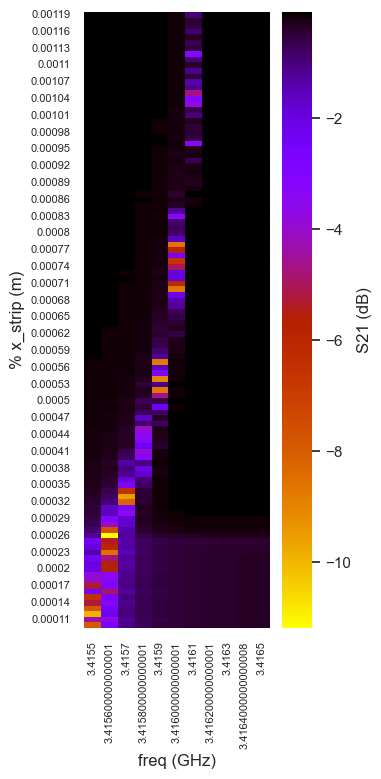

In [143]:
plt.figure(figsize=(3, 8))
# Make heatmap
sns.heatmap(
    chop_compare_pivot,
    cmap='gnuplot_r',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=3,      # Control how many x_strip ticks to show
)

plt.tick_params(axis='both', labelsize=8)

Text(0.5, 1.0, 'Resonator-Strip Coupling Heatmap')

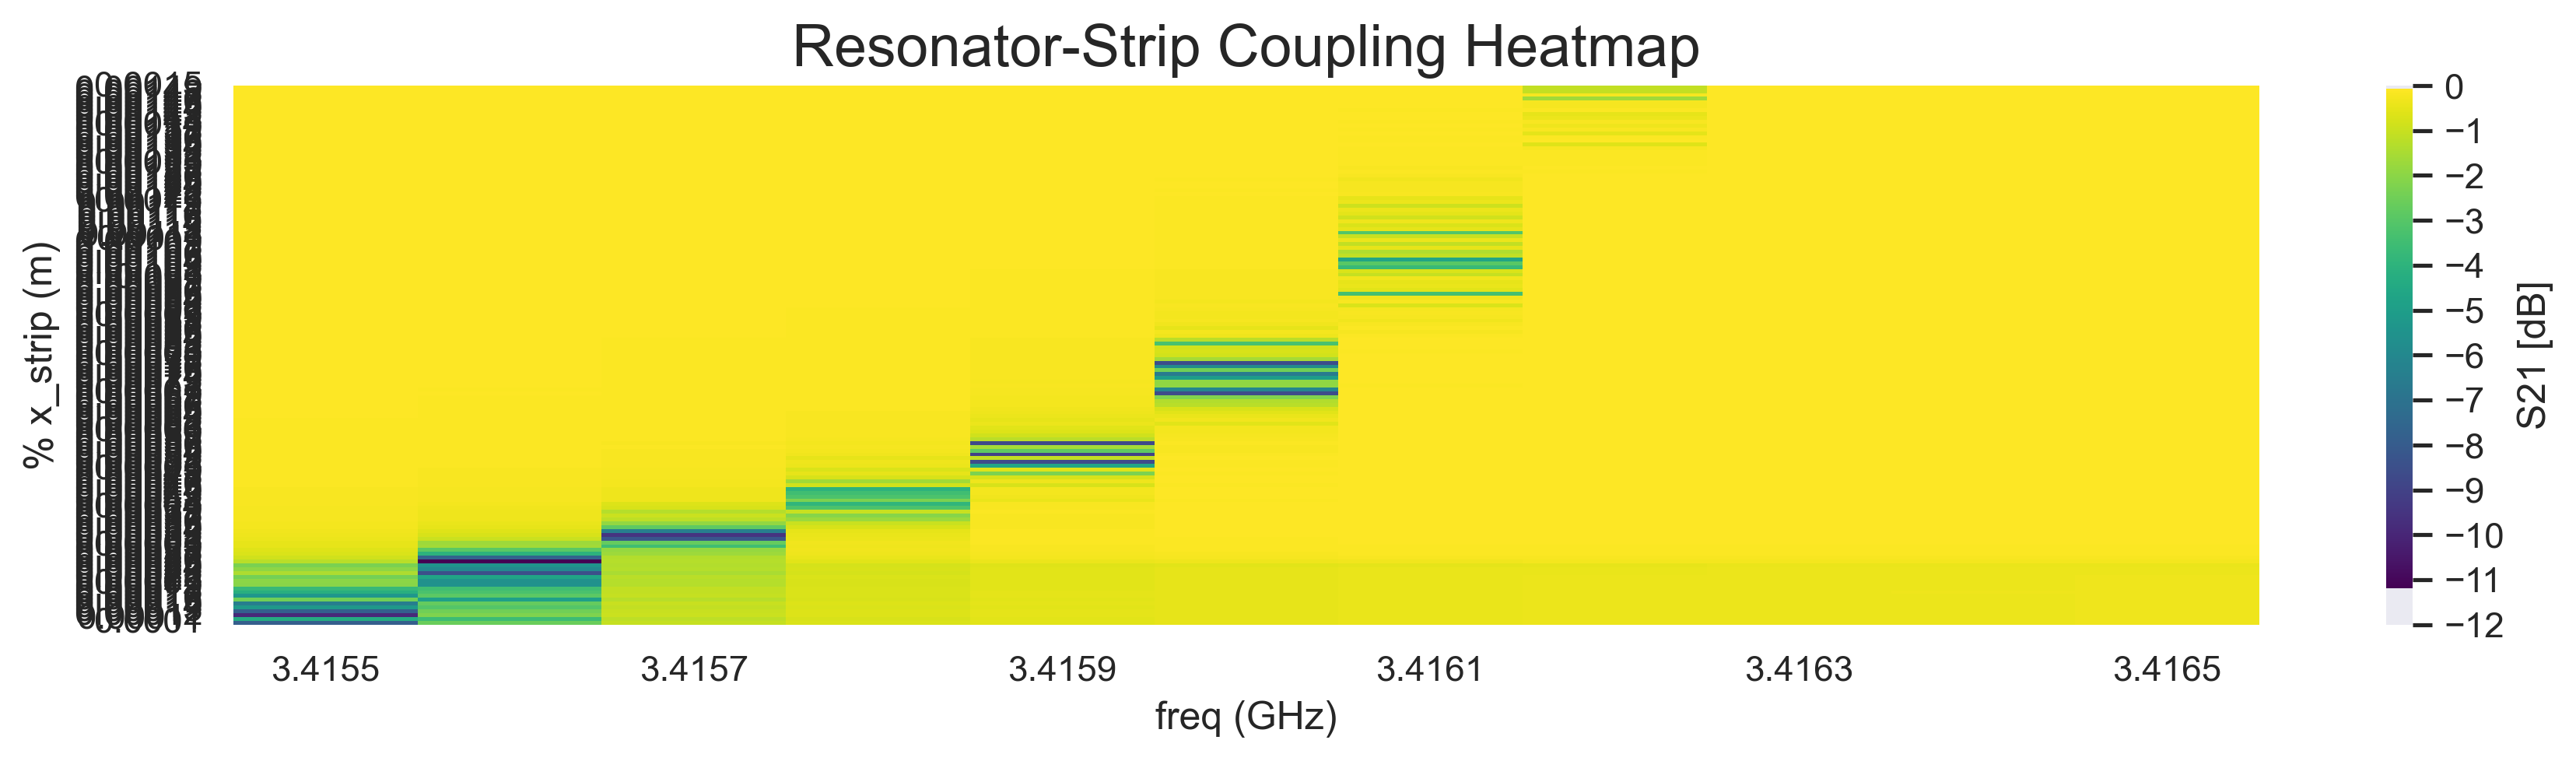

In [115]:
plt.figure(dpi=300, figsize=(14,3))
ax = sns.heatmap(pivoted_2, cmap='viridis', xticklabels=2, yticklabels=True) #linewidths=0.5, linecolor='gray') center=-2.9,
colorbar = ax.collections[0].colorbar
colorbar.set_label('S21 [dB]', fontsize=12)
tick_vals = np.linspace(0, -12, 13)
colorbar.set_ticks(tick_vals)
plt.title('Resonator-Strip Coupling Heatmap', fontsize=18)

In [101]:
all_dips_freq_cut = concat_dips_p11p5[(concat_dips_p11p5['freq (GHz)']>3.4163)]

Text(0.5, 1.0, 'Resonator-Strip Coupling Heatmap')

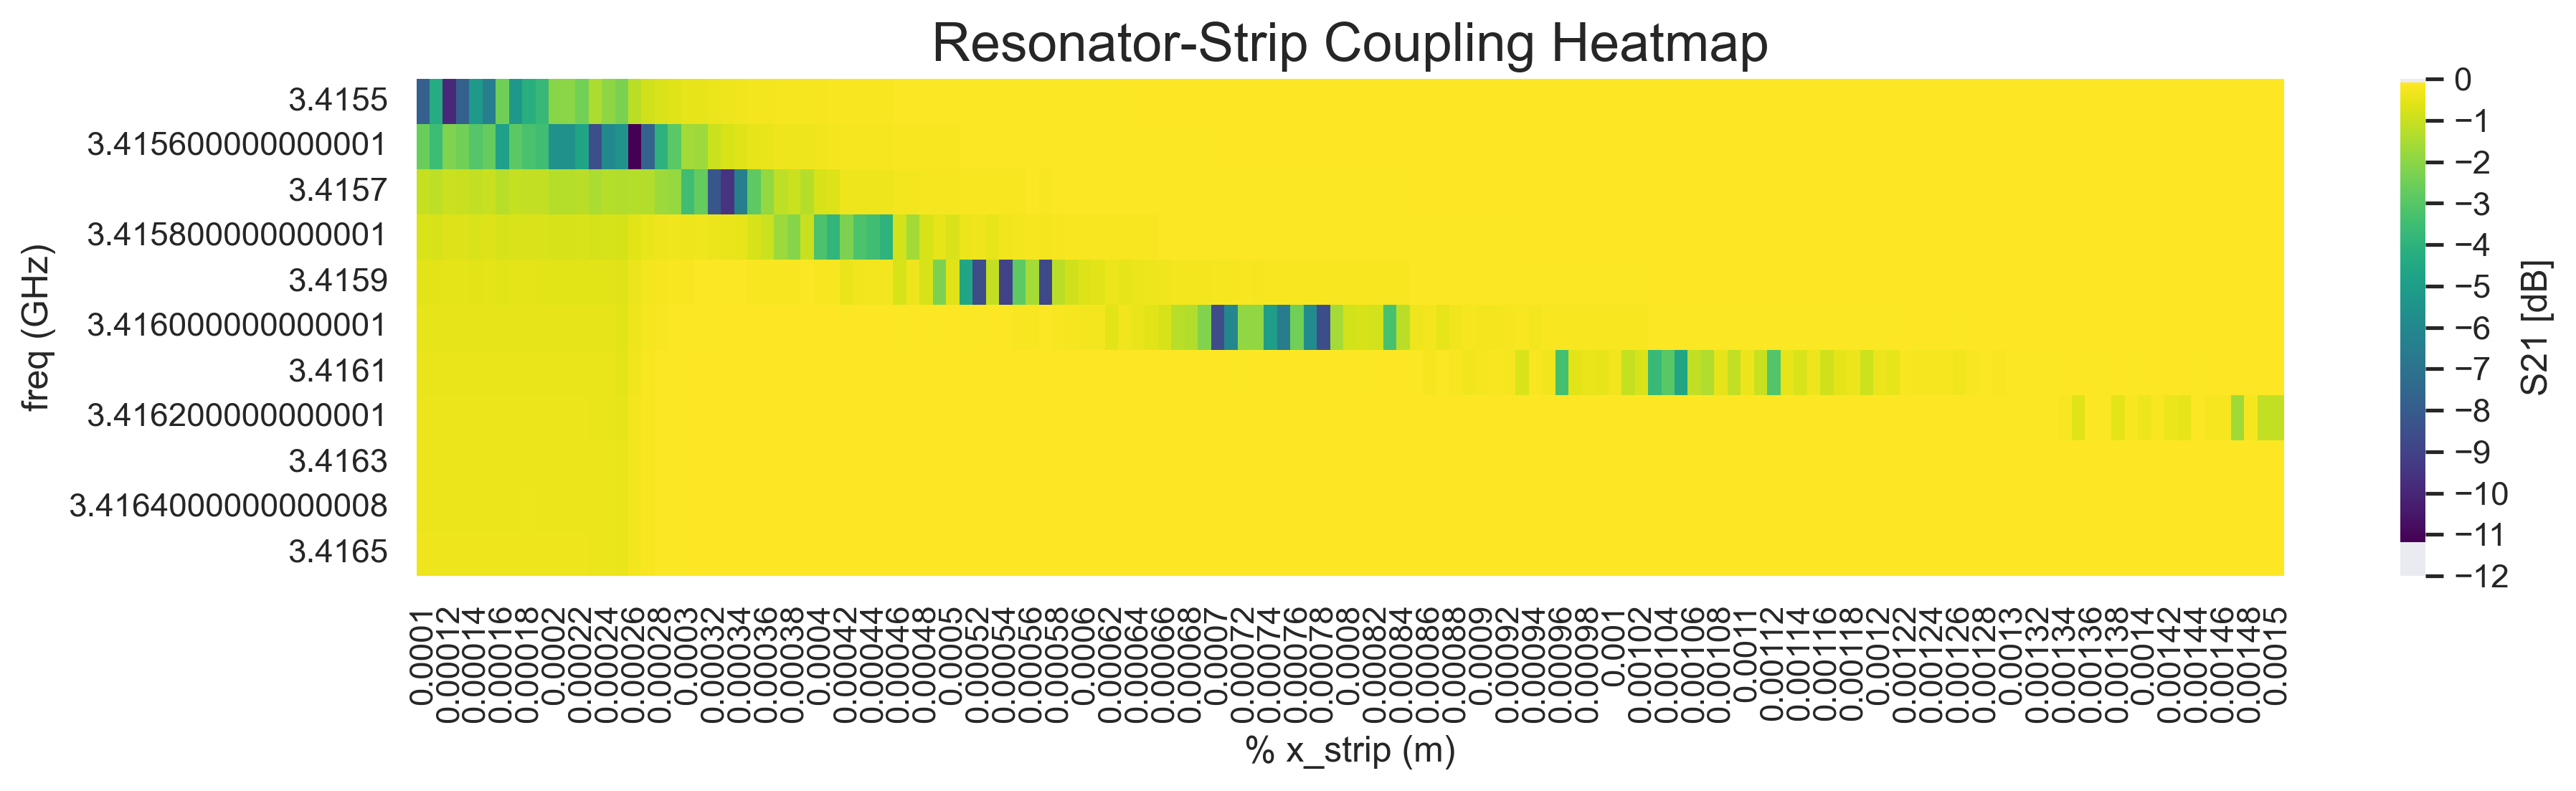

In [110]:
plt.figure(dpi=300, figsize=(14,3))
ax = sns.heatmap(pivoted, cmap='viridis', xticklabels=2, yticklabels=True) #linewidths=0.5, linecolor='gray') center=-2.9,
colorbar = ax.collections[0].colorbar
colorbar.set_label('S21 [dB]', fontsize=12)
tick_vals = np.linspace(0, -12, 13)
colorbar.set_ticks(tick_vals)
plt.title('Resonator-Strip Coupling Heatmap', fontsize=18)

### Now trying to concatenate all of the lower sideband data

In [145]:
p1_1p5

% x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
0            0.0001      3.4155  -3.849967 -7.866684
1            0.0001      3.4156  -5.139305 -2.598708
2            0.0001      3.4157  -8.063576 -1.040910
3            0.0001      3.4158  -9.651232 -0.693295
4            0.0001      3.4159 -10.615323 -0.556647
...             ...         ...        ...       ...
1546         0.0015      3.4161 -22.389992 -0.110884
1547         0.0015      3.4162 -11.251864 -1.080560
1548         0.0015      3.4163 -35.647635 -0.078216
1549         0.0015      3.4164 -30.557075 -0.079000
1550         0.0015      3.4165 -29.300604 -0.080169

[1551 rows x 4 columns]

In [149]:
p1_p1p3_LSB = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_Vacuum_0.1to1.35_GapSweep_3.41GHz_LOWERSIDEBAND.csv', skiprows=4)


In [147]:
p0_p09

% x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
0           0.00010      3.4145 -16.847510 -0.246675
1           0.00010      3.4146 -17.137197 -0.243372
2           0.00010      3.4147 -17.513952 -0.239767
3           0.00010      3.4148 -18.023668 -0.235998
4           0.00010      3.4149 -18.753151 -0.232450
...             ...         ...        ...       ...
1255        0.00135      3.4150 -26.756993 -0.085369
1256        0.00135      3.4151 -26.708245 -0.085542
1257        0.00135      3.4152 -26.649923 -0.085746
1258        0.00135      3.4153 -26.578928 -0.085993
1259        0.00135      3.4154 -26.490658 -0.086300

[1260 rows x 4 columns]

In [63]:
all_dips_freq_cut

% x_strip (m)  freq (GHz)    S11 (1)   S21 (1)   dip_mag
9           0.00010      3.4164 -12.550110 -0.384030 -7.493547
10          0.00010      3.4165 -12.725759 -0.373137 -7.493547
20          0.00011      3.4164 -12.506742 -0.387540 -3.967312
21          0.00011      3.4165 -12.687561 -0.376181 -3.967312
31          0.00012      3.4164 -12.531465 -0.387338 -9.531495
...             ...         ...        ...       ...       ...
1528        0.00148      3.4165 -28.965388 -0.080315 -0.149464
1538        0.00149      3.4164 -30.530505 -0.078890 -1.030290
1539        0.00149      3.4165 -29.266153 -0.080063 -1.030290
1549        0.00150      3.4164 -30.557075 -0.079000 -1.002344
1550        0.00150      3.4165 -29.300604 -0.080169 -1.002344

[282 rows x 5 columns]

In [64]:
pivoted_cut = all_dips_freq_cut.pivot(columns='% x_strip (m)', index='freq (GHz)', values='S21 (1)')  # or 'S21_mag'

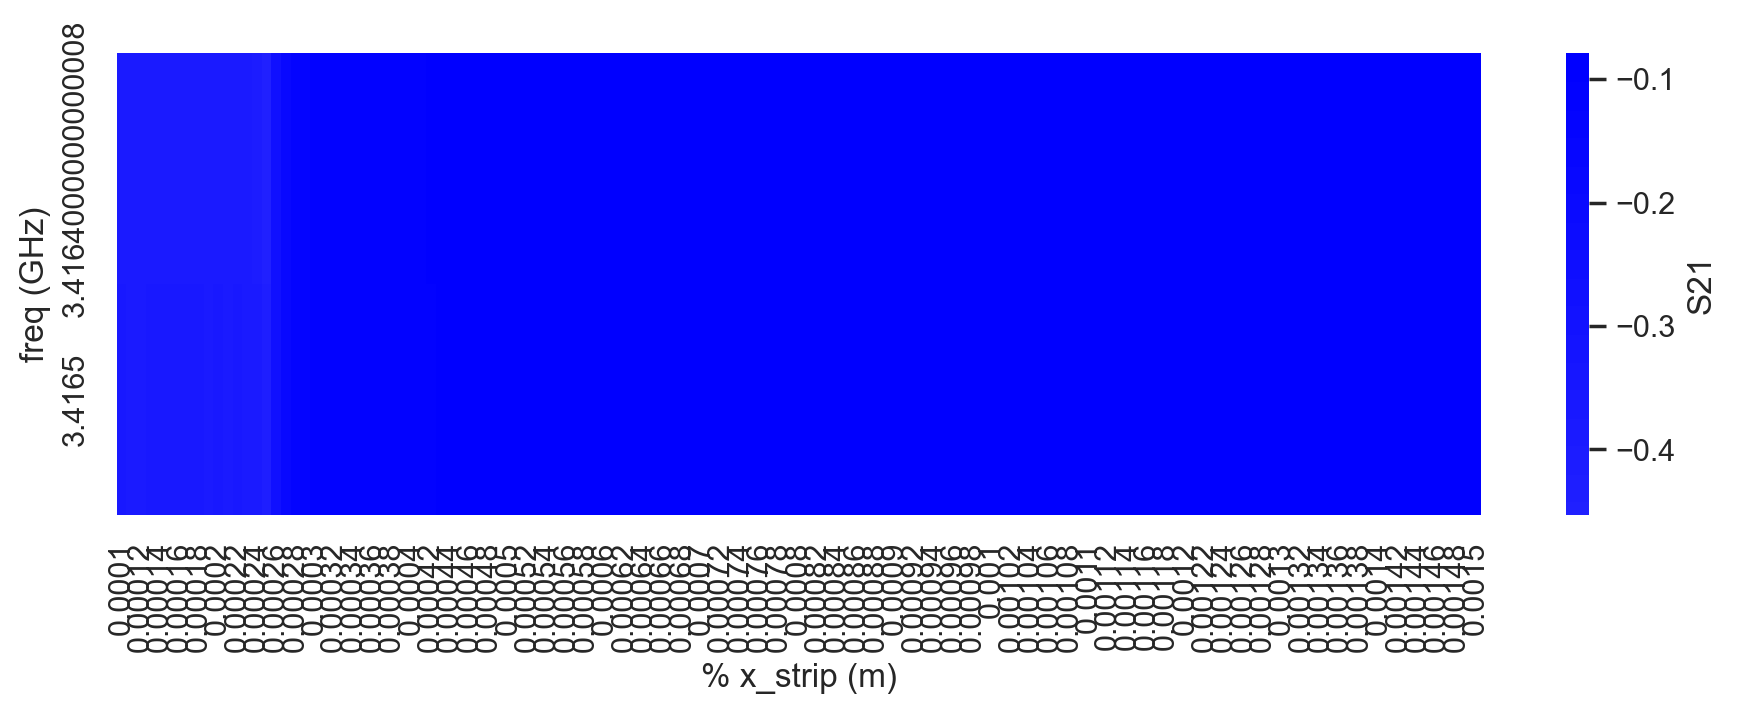

In [65]:
plt.figure(figsize=(11,3), dpi=200)
ax = sns.heatmap(pivoted_cut, cmap='bwr_r', center=-3, xticklabels=2, yticklabels=True)
colorbar = ax.collections[0].colorbar
colorbar.set_label('S21', fontsize=12)
plt.grid(True)

In [173]:
pivoted.index

Index([3.1986000000000003,             3.1987, 3.1988000000000003,
                   3.1989, 3.1990000000000003,             3.1991,
       3.1992000000000003,             3.1993,             3.1994,
                   3.1995,             3.1996,             3.1997,
                   3.1998, 3.1999000000000004, 3.1999999999999997,
       3.2001000000000004, 3.2001999999999997, 3.2003000000000004,
       3.2003999999999997, 3.2005000000000003, 3.2005999999999997],
      dtype='float64', name='freq (GHz)')

In [277]:
# getting dip measurement 

p1p14_dips = p1_p14.copy()
p1p14_dips

% x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
0          0.00010      3.1986 -22.906710 -0.191174
1          0.00010      3.1987 -23.754246 -0.190705
2          0.00010      3.1988 -25.048691 -0.191144
3          0.00010      3.1989 -27.303287 -0.193871
4          0.00010      3.1990 -32.562971 -0.202877
..             ...         ...        ...       ...
100        0.00014      3.2002 -16.289895 -0.260693
101        0.00014      3.2003 -16.535507 -0.254683
102        0.00014      3.2004 -16.738367 -0.250081
103        0.00014      3.2005 -16.908900 -0.246444
104        0.00014      3.2006 -17.054037 -0.243513

[105 rows x 4 columns]

In [84]:
p1 = p1_p14.loc[p1_p14['% x_strip (m)']==0.00010]

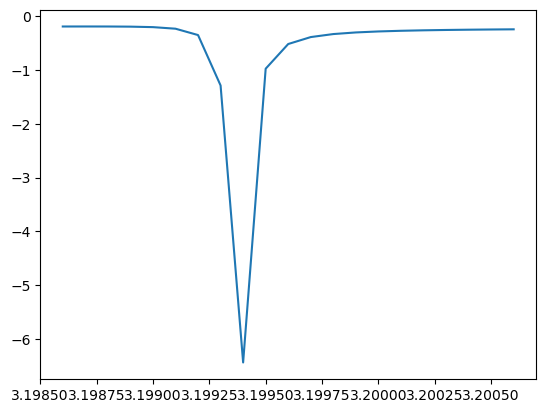

In [86]:
plt.plot(p1['freq (GHz)'], p1['S21 (1)'])

## OLD

In [32]:
S21_p096 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S21_p096mmgap_3p2.csv', skiprows=4)
S21_p126 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S21_p126mmgap_3p2.csv', skiprows=4)
S21_p146 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S21_p146mmgap_3p2.csv', skiprows=4)

In [33]:
S21_p096 = S21_p096.rename(columns={'% freq (GHz)':'freq[GHz]', 'S11 (1)': 'S11', 'S21 (1)': 'S21'})
S21_p126 = S21_p126.rename(columns={'% freq (GHz)':'freq[GHz]', 'S11 (1)': 'S11', 'S21 (1)': 'S21'})
S21_p146 = S21_p146.rename(columns={'% freq (GHz)':'freq[GHz]', 'S11 (1)': 'S11', 'S21 (1)': 'S21'})

In [34]:
from matplotlib.ticker import MultipleLocator

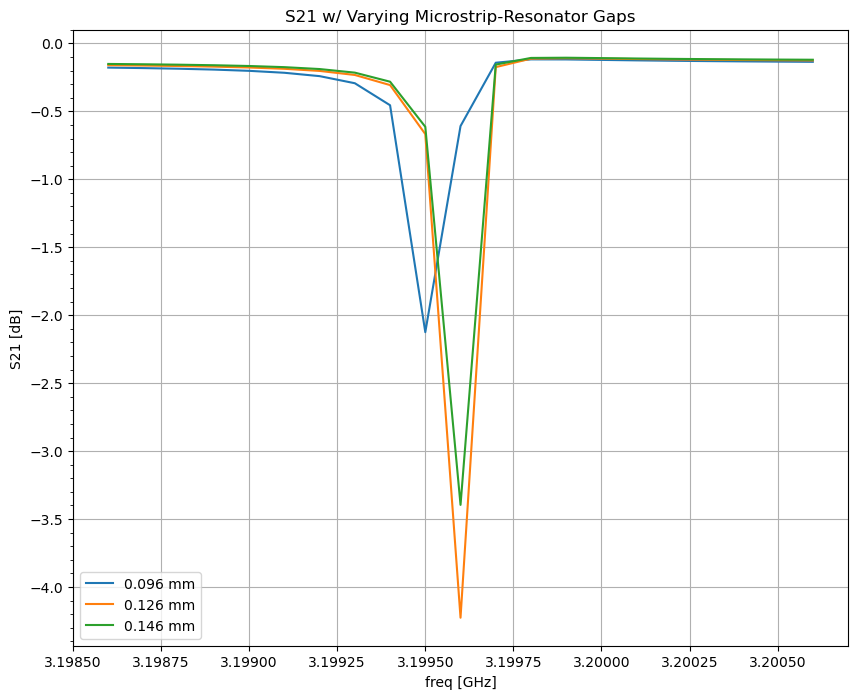

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
# Major ticks every 0.2
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.plot(S21_p096['freq[GHz]'], S21_p096['S21'], label='0.096 mm')
ax.plot(S21_p126['freq[GHz]'], S21_p126['S21'], label='0.126 mm')
ax.plot(S21_p146['freq[GHz]'], S21_p146['S21'], label='0.146 mm')

ax.set_xlabel('freq [GHz]')
ax.set_ylabel('S21 [dB]')
ax.set_title('S21 w/ Varying Microstrip-Resonator Gaps')
ax.legend()
ax.grid(True)


In [41]:
# S21 dips 

p096dip_S21 = min(S21_p096['S21']) - max(S21_p096['S21'])
p126dip_s21 = min(S21_p126['S21']) - max(S21_p126['S21'])
p146dip_s21 = min(S21_p146['S21']) - max(S21_p146['S21'])

print(p096dip_S21, p126dip_s21, p146dip_s21)

-2.0071431657881904 -4.116385750706802 -3.2901005491879163


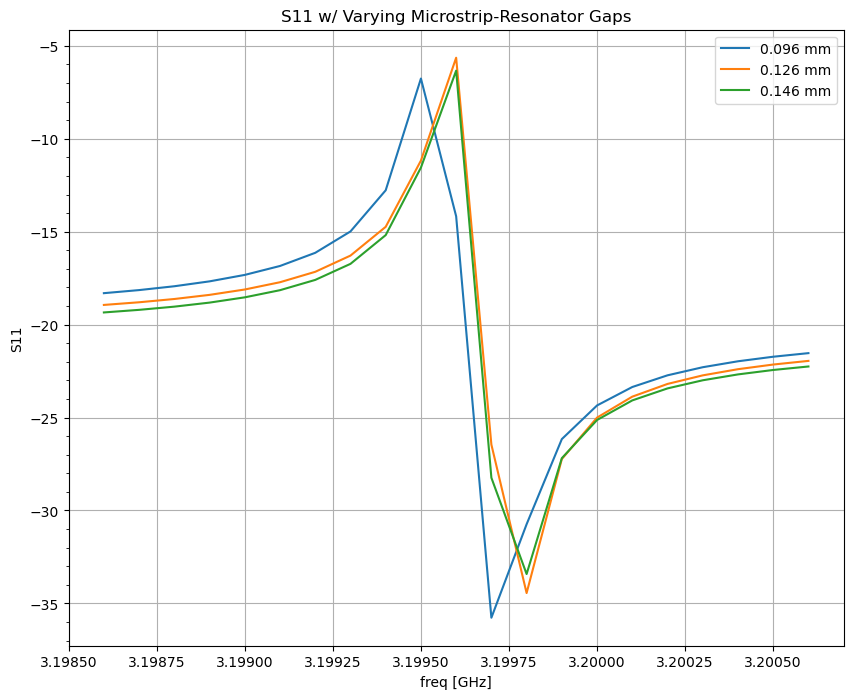

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
# Major ticks every 0.2
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.plot(S21_p096['freq[GHz]'], S21_p096['S11'], label='0.096 mm')
ax.plot(S21_p126['freq[GHz]'], S21_p126['S11'], label='0.126 mm')
ax.plot(S21_p146['freq[GHz]'], S21_p146['S11'], label='0.146 mm')
ax.set_xlabel('freq [GHz]')
ax.set_ylabel('S11')
ax.set_title('S11 w/ Varying Microstrip-Resonator Gaps')
ax.legend()
ax.grid(True)

In [36]:
# stats

print('0.096 mm gap S21 (min, max): (' + str(min(S21_p096['S21'])))#, max(S21_p096['S21']))) + ')')

0.096 mm gap S21 (min, max): (-2.124828766517031


In [37]:
# 
p096min_S21 = min(S21_p096['S21'])
p096max_S21 = max(S21_p096['S21'])
p096min_S11 = min(S21_p096['S11'])
p096max_S11 = max(S21_p096['S21'])

print(str(p096min_S21), str(p096max_S21))

-2.124828766517031 -0.1176856007288409


In [38]:
range(S21_p096['S21'])

TypeError: 'Series' object cannot be interpreted as an integer

In [45]:
# snells law stuff
freq = 3.2*10**9

k_t = 2*cmath.pi*freq/const.c
n_i = 3.07
n_t = 1
n_ti = n_t/n_i 
E_0 = 1e-4
r = np.arange(0.00001, 0.00002, 0.000001)
evan = E_0*cmath.e**(-k_t*(-(1/(n_ti**2)) - 1)*r)

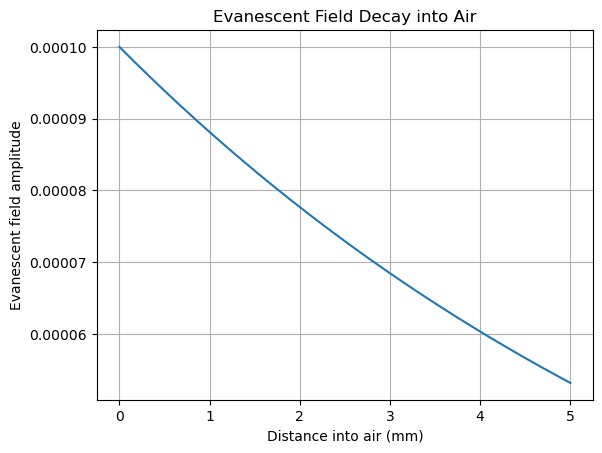

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c

# Constants
freq = 3.2e9  # Hz
n_i = 3.07  # alumina
n_t = 1     # air
theta_i_deg = 44# must be > critical angle
theta_i = np.radians(theta_i_deg)

# Wavevector in vacuum
k_0 = 2 * np.pi * freq / c

# Check for total internal reflection
if np.sin(theta_i) <= n_t / n_i:
    raise ValueError("No total internal reflection — evanescent wave won't form.")

# Decay constant (imaginary part of k_z in transmitted medium)
kappa = k_0 * np.sqrt((n_i * np.sin(theta_i))**2 - n_t**2)

# Spatial domain
r = np.linspace(0, 5e-3, 500)  # 5 mm depth into air

# Evanescent field
E_0 = 1e-4
E = E_0 * np.exp(-kappa * r)

# Plot
plt.plot(r * 1e3, E.real)
plt.xlabel('Distance into air (mm)')
plt.ylabel('Evanescent field amplitude')
plt.title('Evanescent Field Decay into Air')
plt.grid(True)
plt.show()

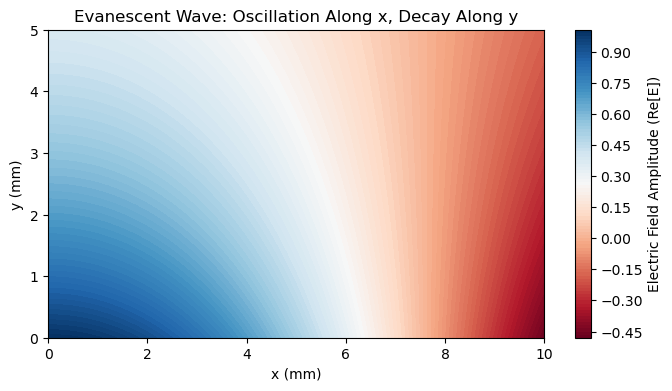

In [74]:
# Constants
freq = 3.2e9  # Hz
omega = 2 * np.pi * freq
n_i = 3.07  # alumina
n_t = 1     # air
theta_i_deg = 90  # degrees, must be > critical angle
theta_i = np.radians(theta_i_deg)

# Wavevector in vacuum
k_0 = 2 * np.pi * freq / c

# Tangential and perpendicular components
k_x = k_0 * n_i * np.sin(theta_i)  # real
kappa = k_0 * np.sqrt((n_i * np.sin(theta_i))**2 - n_t**2)  # decay constant

# Spatial grid
x = np.linspace(0, 10e-3, 500)  # 10 mm
y = np.linspace(0, 5e-3, 250)   # 5 mm into air
X, Y = np.meshgrid(x, y)

# Evanescent field (real part at t = 0)
E_0 = 1
E = E_0 * np.exp(1j * k_x * X) * np.exp(-kappa * Y)
E_real = np.real(E)

# Plot
plt.figure(figsize=(8, 4))
contour = plt.contourf(X * 1e3, Y * 1e3, E_real, levels=100, cmap='RdBu')
plt.colorbar(contour, label='Electric Field Amplitude (Re[E])')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Evanescent Wave: Oscillation Along x, Decay Along y')
plt.show()

In [69]:
evan

array([0.0001007 , 0.00010077, 0.00010084, 0.00010091, 0.00010098,
       0.00010105, 0.00010112, 0.0001012 , 0.00010127, 0.00010134,
       0.00010141])

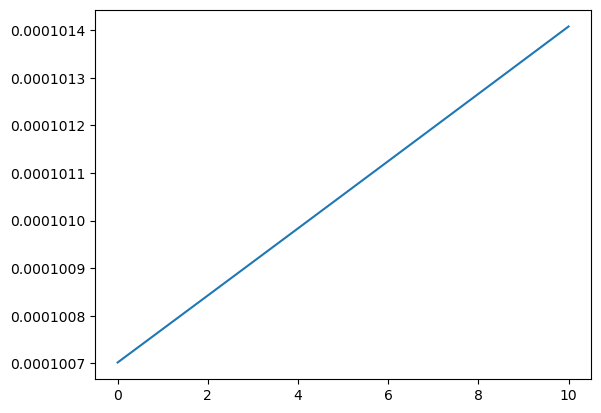

In [70]:
plt.plot(evan)